<center><h1>Solar Cycle 24 Analytics for Geomagnetic Storms</h1></center>

This notebook will look at the frequency of geomagnetic storms across all 5 NOAA scales through the previous solar cycle (SC) 24.

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h3>Data</h3>

Prepare dataset for SC24 for analysis. Source: [GFZ Potsdam](https://www.gfz-potsdam.de/en/section/geomagnetism/data-products-services/geomagnetic-kp-index)

In [184]:
df = pd.read_csv("C:/Users/john.mayers/Documents/SC24_Analytics/Data/kpdata.txt", sep =" ")
df.head()

,2009,01,01.1,00.0,01.50,28125.00000,28125.06250,Unnamed: 7,1.667,Unnamed: 9,Unnamed: 10,Unnamed: 11,6,1
0,2009,1,1,3.0,4.5,28125.125,28125.1875,NaN,2.333,NaN,NaN,NaN,9.0,1.0
1,2009,1,1,6.0,7.5,28125.250,28125.3125,NaN,2.667,NaN,NaN,12.0,1.0,NaN
2,2009,1,1,9.0,10.5,28125.375,28125.4375,NaN,2.000,NaN,NaN,NaN,7.0,1.0
3,2009,1,1,12.0,13.5,28125.500,28125.5625,NaN,2.333,NaN,NaN,NaN,9.0,1.0
4,2009,1,1,15.0,16.5,28125.625,28125.6875,NaN,1.667,NaN,NaN,NaN,6.0,1.0


In [185]:
# verifying dates 2009-2020 in ds
df.tail()

,2009,01,01.1,00.0,01.50,28125.00000,28125.06250,Unnamed: 7,1.667,Unnamed: 9,Unnamed: 10,Unnamed: 11,6,1
32138,2020,1,1,9.0,10.5,32142.375,32142.4375,NaN,0.667,NaN,NaN,NaN,3.0,1.0
32139,2020,1,1,12.0,13.5,32142.500,32142.5625,NaN,0.667,NaN,NaN,NaN,3.0,1.0
32140,2020,1,1,15.0,16.5,32142.625,32142.6875,NaN,1.333,NaN,NaN,NaN,5.0,1.0
32141,2020,1,1,18.0,19.5,32142.750,32142.8125,NaN,1.000,NaN,NaN,NaN,4.0,1.0
32142,2020,1,1,21.0,22.5,32142.875,32142.9375,NaN,0.667,NaN,NaN,NaN,3.0,1.0


In [186]:
kp = df.iloc[:,8]

In [187]:
df.columns

Index(['2009', '01', '01.1', '00.0', '01.50', '28125.00000', '28125.06250',
       'Unnamed: 7', '1.667', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', '6',
       '1'],
      dtype='object')

In [188]:
#Deleting all columns but date and 3 hrly Kp
df = df.drop(columns=['00.0', '01.50', '28125.00000', '28125.06250',
       'Unnamed: 7','Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', '6',
       '1'])

In [189]:
df.head()

,2009,01,01.1,1.667
0,2009,1,1,2.333
1,2009,1,1,2.667
2,2009,1,1,2.000
3,2009,1,1,2.333
4,2009,1,1,1.667


In [190]:
df.columns=['Year', 'Month', 'Day', 'Kp']

In [191]:
df.head()

,Year,Month,Day,Kp
0,2009,1,1,2.333
1,2009,1,1,2.667
2,2009,1,1,2.000
3,2009,1,1,2.333
4,2009,1,1,1.667


In [192]:
freq = df['Kp'].value_counts()

In [193]:
#Preparing to plot frequency table of 3 hrly Kp
freq_df = pd.DataFrame(freq)
freq_df.head()

,Kp
0.667,4162
0.333,4141
1.000,3620
1.333,3122
0.000,2922


In [194]:
#Only 1 column, need 2 for x and y values to plot
freq_df.shape

(26, 1)

In [195]:
freq_df.iloc[[1]]

,Kp
0.333,4141


In [196]:
freq_df = freq_df.reset_index(drop=False)

In [197]:
freq_df.columns

Index(['index', 'Kp'], dtype='object')

In [198]:
freq_df.head()

,index,Kp
0,0.667,4162
1,0.333,4141
2,1.000,3620
3,1.333,3122
4,0.000,2922


In [199]:
freq_df.shape

(26, 2)

In [200]:
freq_df = freq_df.rename(columns={"index": "Kp", "Kp": "Count"})
freq_df.head()

,Kp,Count
0,0.667,4162
1,0.333,4141
2,1.000,3620
3,1.333,3122
4,0.000,2922


In [201]:
freq_df = freq_df.sort_values(by=['Kp']) #sort ascending by Kp
freq_df.head()

,Kp,Count
4,0.000,2922
1,0.333,4141
0,0.667,4162
2,1.000,3620
3,1.333,3122


In [202]:
Glist = ['Nan','Nan','Nan','Nan','Nan','Nan','Nan','Nan','Nan','Nan','Nan','Nan','Nan','Nan', 'G1', 'G1', 'G1', 'G2', 'G2', 'G2', 'G3', 'G3', 'G3', 'G4', 'G4', 'G4']

In [206]:
freq_df['G'] = Glist
freq_df.head()

,Kp,Count,G
4,0.000,2922,Nan
1,0.333,4141,Nan
0,0.667,4162,Nan
2,1.000,3620,Nan
3,1.333,3122,Nan


In [207]:
#subset the df
freq_sub = freq_df.iloc[14:26,:]
freq_sub.head()

,Kp,Count,G
14,4.667,294,G1
15,5.000,182,G1
16,5.333,135,G1
17,5.667,96,G2
19,6.000,43,G2


In [208]:
#sum up at the G values into a new table
G1 = 294+182+135

In [209]:
G2 = 96+43+50

In [210]:
G3 = 15+7+6

In [211]:
G4 = 8+2+2

In [212]:
G5 = 0

In [213]:
data = [['G1', G1], ['G2', G2], ['G3', G3], ['G4', G4]]

In [214]:
final = pd.DataFrame(data, columns=['G', 'Count'])
final

,G,Count
0,G1,611
1,G2,189
2,G3,28
3,G4,12


<h3>Analysis</h3>

In [215]:
G_list = ['G1', 'G2', 'G3', 'G4', 'G5']

In [216]:
count = [G1, G2, G3, G4, G5]

In [217]:
table = pd.DataFrame(count, columns=['G_list'])
table

,G_list
0,611
1,189
2,28
3,12
4,0


In [218]:
table['G'] = ['G1', 'G2', 'G3', 'G4', 'G5']

In [219]:
table

,G_list,G
0,611,G1
1,189,G2
2,28,G3
3,12,G4
4,0,G5


In [220]:
table = table.rename(columns={"G_list": "Count"})
table

,Count,G
0,611,G1
1,189,G2
2,28,G3
3,12,G4
4,0,G5


In [221]:
table = table[['G', 'Count']]
table

,G,Count
0,G1,611
1,G2,189
2,G3,28
3,G4,12
4,G5,0


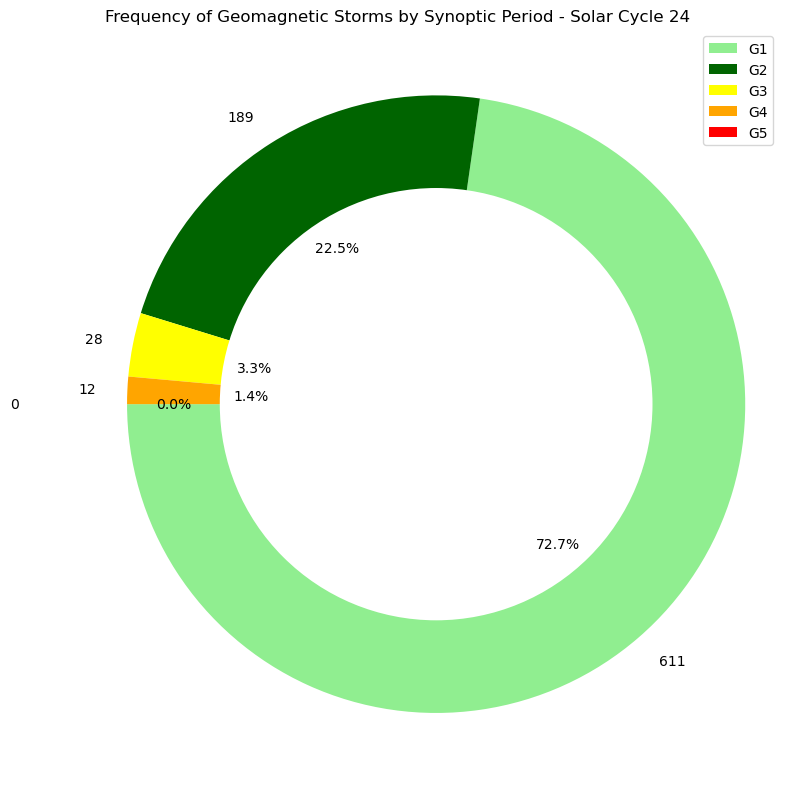

In [222]:
# Pie chart
labels = table['Count']
colors = ['lightgreen','darkgreen','yellow','orange', 'red']
explode = (0, 0, 0, 0, 0.25)

fig1, ax1 = plt.subplots()
ax1.pie(table['Count'], labels=labels, explode=explode, colors=colors, autopct='%1.1f%%', startangle=180)


centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

fig.set_size_inches(8,8)

labels2 = table['G']

plt.legend(labels2, loc="best")
plt.title('Frequency of Geomagnetic Storms by Synoptic Period - Solar Cycle 24')

ax1.axis('equal')
plt.tight_layout()
plt.show()

In [223]:
table['Num Days'] = round(table['Count']/3) #These numbers represent 3-hr periods. Breaking down by day...
table['Num Days'] = table['Num Days'].astype(int)

C:\Users\john.mayers\AppData\Local\Temp\4\ipykernel_18676\249424047.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Num Days'] = round(table['Count']/3) #These numbers represent 3-hr periods. Breaking down by day...
C:\Users\john.mayers\AppData\Local\Temp\4\ipykernel_18676\249424047.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  table['Num Days'] = table['Num Days'].astype(int)


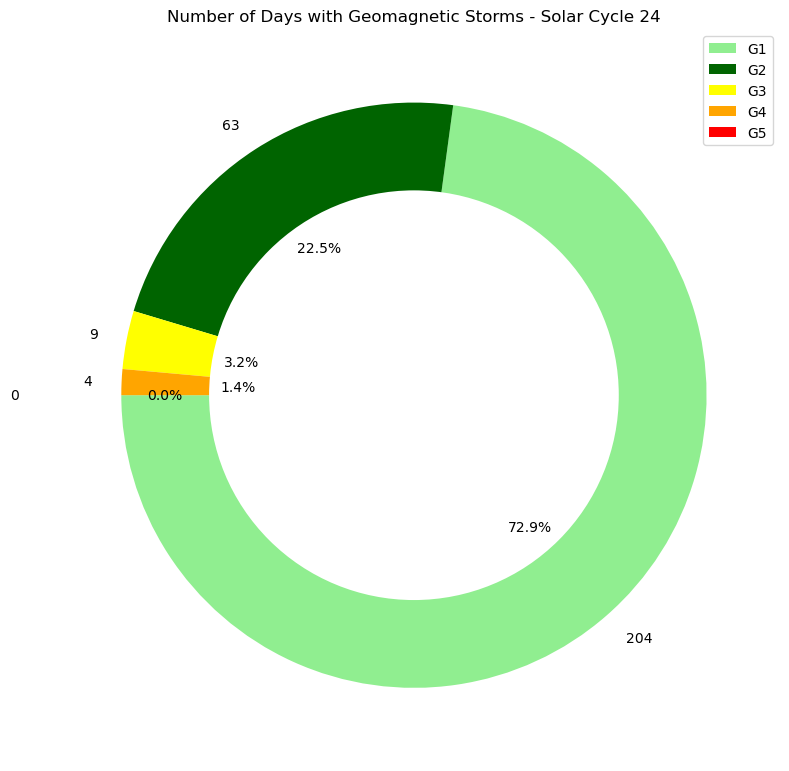

In [224]:
labels = table['Num Days']
colors = ['lightgreen','darkgreen','yellow','orange', 'red']
explode = (0, 0, 0, 0, 0.25)

fig2, ax2 = plt.subplots()
ax2.pie(table['Num Days'], explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', startangle=180)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

fig.set_size_inches(8,8)

labels2 = table['G']
plt.legend(labels2, loc="best")
plt.title('Number of Days with Geomagnetic Storms - Solar Cycle 24')

ax1.axis('equal')
plt.tight_layout()
plt.show()

In [225]:
g3g4g5 = by_day[3] + by_day[2]
print(f'There were only {g3g4g5} days out of 11 years or 4,015 days of G3 and greater storming.')

There were only 13.0 days out of 11 years or 4,015 days of G3 and greater storming.


In [226]:
amt = 13/4015 *100
print(f"Only {amt} percent of the time do we observe G3 and greater geomagnetic storms.")

Only 0.32378580323785805 percent of the time do we observe G3 and greater geomagnetic storms.
